In [304]:
import warnings
warnings.filterwarnings('ignore')

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [306]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [307]:
#Read the input file
bike_shr_dt=pd.read_csv('day.csv')

In [308]:
bike_shr_dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [309]:
bike_shr_dt.shape

(730, 16)

In [310]:
#No null data
bike_shr_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Data Visualization

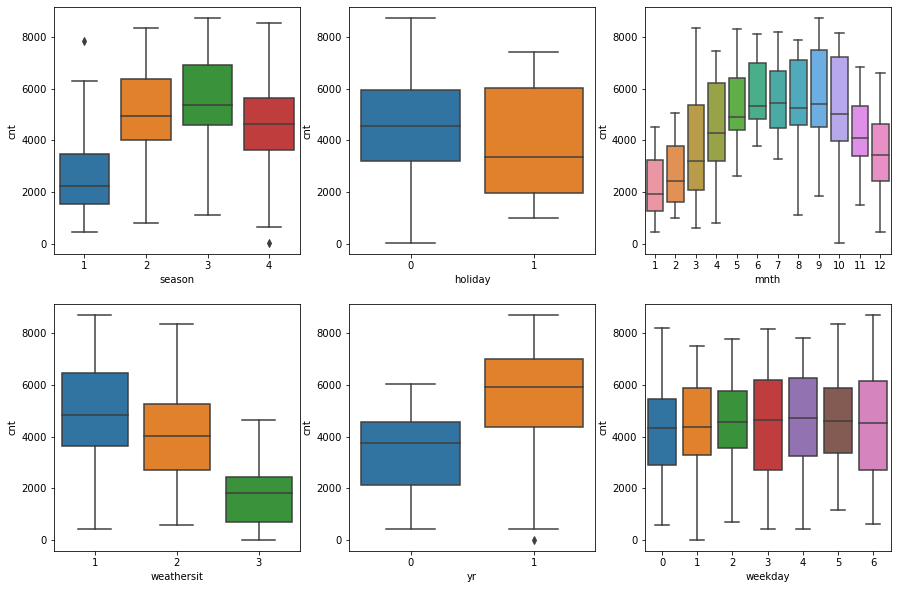

In [311]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_shr_dt)
plt.subplot(2,3,2)
sns.boxplot(x='holiday',y='cnt',data=bike_shr_dt)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_shr_dt)
plt.subplot(2,3,4)
sns.boxplot(x='weathersit',y='cnt',data=bike_shr_dt)
plt.subplot(2,3,5)
sns.boxplot(x='yr',y='cnt',data=bike_shr_dt)
plt.subplot(2,3,6)
sns.boxplot(x='weekday',y='cnt',data=bike_shr_dt)

plt.show()

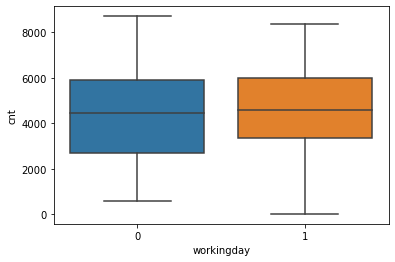

In [312]:
sns.boxplot(x='workingday',y='cnt',data=bike_shr_dt)
plt.show()

In [313]:
## Maximum usage was in the fall season
## Maximum count of bike sharing is for the month of Sep
## There is an increae in the count for the year 2019.
## No data can be seen for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather situation.

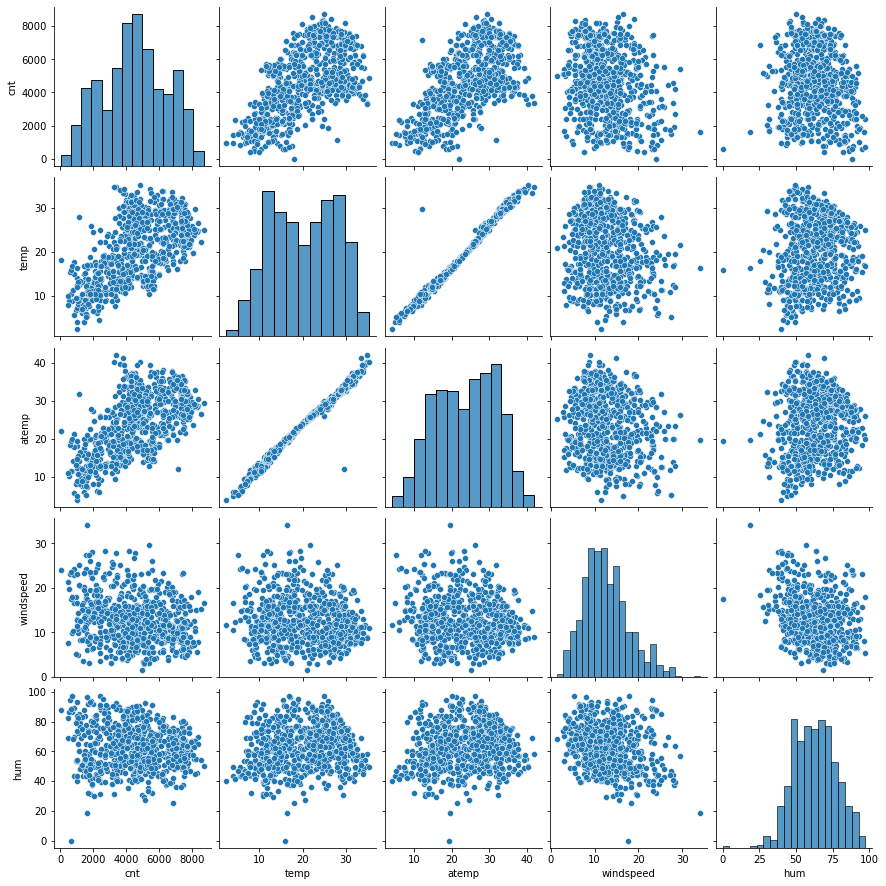

In [314]:
sns.pairplot(data=bike_shr_dt,vars=['cnt','temp','atemp','windspeed','hum'])
plt.show()

# Data Preparation

In [315]:
## We can drop certain columns which are not required for our analysis.
bike_shr_dt.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike_shr_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [316]:
## We can map the values to the corresponding categories.
bike_shr_dt.season=bike_shr_dt.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike_shr_dt.weathersit=bike_shr_dt.weathersit.map({1:'Clr_Few_partly_clouds',2:'Mist_Cloudy_Broken_clouds',3:'Light_Snow_Rain_Thndr',4:'Heavy Rain_Ice Pallets'})
bike_shr_dt.weekday=bike_shr_dt.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike_shr_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Saturday,0,Mist_Cloudy_Broken_clouds,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Sunday,0,Mist_Cloudy_Broken_clouds,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Monday,1,Clr_Few_partly_clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,Tuesday,1,Clr_Few_partly_clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,Wednesday,1,Clr_Few_partly_clouds,9.305237,11.46350,43.6957,12.522300,1600


In [317]:
## Create dummy variables for all the categorical features.

In [318]:
bike_shr_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [319]:
season_det=pd.get_dummies(bike_shr_dt['season'],drop_first=True)
weather_det=pd.get_dummies(bike_shr_dt['weathersit'],drop_first=True)
mnth_det=pd.get_dummies(bike_shr_dt['mnth'],drop_first=True)
weekday_det=pd.get_dummies(bike_shr_dt['weekday'],drop_first=True)

In [320]:
bike_shr_dt=pd.concat([bike_shr_dt,season_det],axis=1)
bike_shr_dt=pd.concat([bike_shr_dt,weather_det],axis=1)
bike_shr_dt=pd.concat([bike_shr_dt,mnth_det],axis=1)
bike_shr_dt=pd.concat([bike_shr_dt,weekday_det],axis=1)

In [321]:
bike_shr_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,1,0,Saturday,0,Mist_Cloudy_Broken_clouds,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,Spring,0,1,0,Sunday,0,Mist_Cloudy_Broken_clouds,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,Spring,0,1,0,Monday,1,Clr_Few_partly_clouds,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,Spring,0,1,0,Tuesday,1,Clr_Few_partly_clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,Spring,0,1,0,Wednesday,1,Clr_Few_partly_clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [322]:
bike_shr_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     730 non-null    object 
 1   yr                         730 non-null    int64  
 2   mnth                       730 non-null    int64  
 3   holiday                    730 non-null    int64  
 4   weekday                    730 non-null    object 
 5   workingday                 730 non-null    int64  
 6   weathersit                 730 non-null    object 
 7   temp                       730 non-null    float64
 8   atemp                      730 non-null    float64
 9   hum                        730 non-null    float64
 10  windspeed                  730 non-null    float64
 11  cnt                        730 non-null    int64  
 12  Spring                     730 non-null    uint8  
 13  Summer                     730 non-null    uint8  

In [323]:
## Now that we have created various categories we can drop the original columns as they will be redundant now.

In [324]:
bike_shr_dt.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bike_shr_dt.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [325]:
## Now we can split the above data into training and test data.

In [326]:
train,test=train_test_split(bike_shr_dt,train_size=0.7,test_size=0.3,random_state=100)

In [327]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         510 non-null    int64  
 1   holiday                    510 non-null    int64  
 2   workingday                 510 non-null    int64  
 3   temp                       510 non-null    float64
 4   atemp                      510 non-null    float64
 5   hum                        510 non-null    float64
 6   windspeed                  510 non-null    float64
 7   cnt                        510 non-null    int64  
 8   Spring                     510 non-null    uint8  
 9   Summer                     510 non-null    uint8  
 10  Winter                     510 non-null    uint8  
 11  Light_Snow_Rain_Thndr      510 non-null    uint8  
 12  Mist_Cloudy_Broken_clouds  510 non-null    uint8  
 13  2                          510 non-null    uint8 

In [328]:
## Here we can use the above data to create a linear model.

In [329]:
scaler=MinMaxScaler()

In [330]:
vars=['cnt','hum','windspeed','temp','atemp']
train[vars]=scaler.fit_transform(train[vars])

In [331]:
y_train=train.pop('cnt')
X_train=train

In [332]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,13)
rfe=rfe.fit(X_train,y_train)

In [333]:
## We can use the statsmodels to build a model

In [334]:
colmn=X_train.columns[rfe.support_]
X_train_col=X_train[colmn]

In [335]:
X_train_rf=sm.add_constant(X_train_col)

In [336]:
lm=sm.OLS(y_train,X_train_rf).fit()

In [337]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.25e-187
Time:                        17:00:40   Log-Likelihood:                 505.47
No. Observations:                 510   AIC:                            -982.9
Df Residuals:                     496   BIC:                            -923.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [338]:
## Along with p value we need to consider VIF also and eliminate columns with very high VIF

In [339]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.45
2,temp,14.46
4,windspeed,4.65
5,Spring,3.35
6,Winter,2.74
8,Mist_Cloudy_Broken_clouds,2.26
0,yr,2.09
10,4,1.46
11,5,1.39
9,3,1.28


In [340]:
## As we can see from the above the VIF for hum feature is very high we can drop it

In [341]:
X_train_col=X_train_col.drop(['hum'],axis=1)

In [342]:
X_train_rf=sm.add_constant(X_train_col)
lm=sm.OLS(y_train,X_train_rf).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          4.89e-185
Time:                        17:00:40   Log-Likelihood:                 496.52
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     497   BIC:                            -912.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [343]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.64
2,temp,3.93
0,yr,2.08
4,Spring,1.95
5,Winter,1.55
7,Mist_Cloudy_Broken_clouds,1.53
9,4,1.33
8,3,1.28
10,5,1.25
11,9,1.20


In [344]:
##Residual Analysis

In [345]:
y_train_chk=lm.predict(X_train_rf)

Text(0.5, 0, 'Errors')

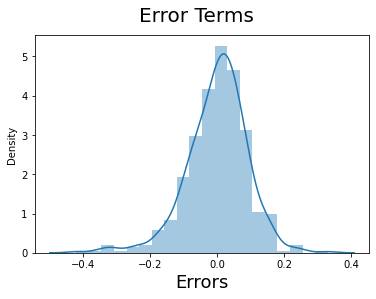

In [346]:
fig = plt.figure()
sns.distplot((y_train - y_train_chk), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

# Make predictions

In [347]:
num_vars = ['cnt', 'hum', 'windspeed', 'temp', 'atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [348]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.082192,0.073059,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.275286,0.260830,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [349]:
y_test = test.pop('cnt')
X_test = test

In [353]:
X_test_new = X_test[X_train_rf.columns]
X_test_new=sm.add_constant(X_test_new)

In [354]:
y_pred=lm.predict(X_test_new)

In [355]:
from sklearn.metrics import r2_score

In [356]:
r2_score(y_test, y_pred)

0.807311344759895

In [357]:
## Model evaluation

Text(0, 0.5, 'y_pred')

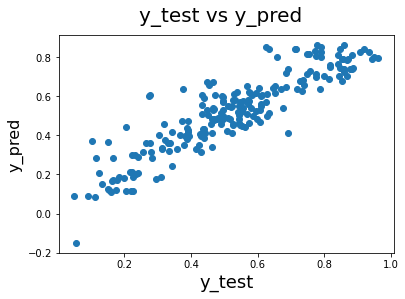

In [358]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [367]:
param=pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns={0:'Coefficient value'},inplace=True)
param['index']=list(range(0,13))
param.set_index('index',inplace=True)
param.sort_values(by='Coefficient value',ascending=False,inplace=True)
param

,Variables,Coefficient value
index,,
3,temp,0.450240
1,yr,0.234337
0,const,0.221754
12,9,0.083690
6,Winter,0.078548
11,5,0.055059
9,3,0.050091
10,4,0.044303
8,Mist_Cloudy_Broken_clouds,-0.080406


In [368]:
## from the above parameters we can derive our final best suited model line

In [ ]:
cnt=0.221754 + 0.450240(temp) + 0.234337(yr) + 0.083690(9-month september) + 0.078548(Winter) + 0.055059(5-May) + 0.050091(3- Mar) + 0.044303(4- April) - 0.080406(Mist_Cloudy_Broken_clouds) - 0.090125(Spring)- 0.092205(holiday)- 0.149629(windspeed) - 0.289149(Light_Snow_Rain_Thndr)     